<a href="https://colab.research.google.com/github/tusharpokale72/Data-science-2024/blob/main/Stock_Market_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Stock market data.xlsx to Stock market data.xlsx


In [5]:
df = pd.read_excel('Stock market data.xlsx')

In [6]:
df.head()

,timestamp,symbol,open_price,high_price,low_price,close_price,volume
0,2025-01-07 05:15:00,NSE:ABB-EQ,6701.30,6704.90,6678.95,6688.85,2171
1,2025-01-07 06:00:00,NSE:ABB-EQ,6702.35,6707.20,6695.00,6699.95,1946
2,2025-01-07 05:45:00,NSE:ABB-EQ,6692.95,6709.25,6690.45,6703.40,4039
3,2025-01-07 09:45:00,NSE:ABB-EQ,6709.50,6709.75,6665.40,6670.60,17808
4,2025-01-07 04:45:00,NSE:ABB-EQ,6689.35,6713.25,6671.55,6703.70,9619


In [7]:
df.tail()

,timestamp,symbol,open_price,high_price,low_price,close_price,volume
595,2025-01-07 07:45:00,NSE:ABB-EQ,6732.45,6733.25,6712.4,6721.10,6408
596,2025-01-07 04:15:00,NSE:ABB-EQ,6708.20,6713.00,6641.5,6648.90,13761
597,2025-01-07 05:00:00,NSE:ABB-EQ,6699.60,6704.95,6690.0,6701.30,2722
598,2025-01-07 05:30:00,NSE:ABB-EQ,6691.70,6704.75,6677.8,6692.95,3565
599,2025-01-07 06:30:00,NSE:ABB-EQ,6690.00,6695.05,6670.0,6675.00,3129


In [8]:
df.describe()

,timestamp,open_price,high_price,low_price,close_price,volume
count,600,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2025-01-17 06:45:00,6344.349917,6361.547917,6324.403917,6341.670333,11170.283333
min,2025-01-01 03:45:00,5497.600000,5508.850000,5405.000000,5497.900000,1037.000000
25%,2025-01-08 23:15:00,6122.087500,6137.212500,6103.125000,6117.775000,5226.750000
50%,2025-01-16 18:45:00,6319.350000,6335.225000,6298.600000,6318.350000,8799.000000
75%,2025-01-25 02:15:00,6602.225000,6624.100000,6588.500000,6600.412500,13771.500000
max,2025-02-01 09:45:00,6942.000000,6947.700000,6930.250000,6942.000000,117045.000000
std,NaN,328.040279,325.044127,333.290727,329.120019,11183.903429


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    600 non-null    datetime64[ns]
 1   symbol       600 non-null    object        
 2   open_price   600 non-null    float64       
 3   high_price   600 non-null    float64       
 4   low_price    600 non-null    float64       
 5   close_price  600 non-null    float64       
 6   volume       600 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 32.9+ KB


**Performing a EDA**

In [10]:
df.isnull().sum()

,0
timestamp,0
symbol,0
open_price,0
high_price,0
low_price,0
close_price,0
volume,0


In [12]:
df.duplicated().sum()

0

In [14]:
sns.set_style(style='darkgrid')

In [15]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,8)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df['symbol'].unique()

array(['NSE:ABB-EQ'], dtype=object)

In [23]:
df.drop(['symbol'],axis=1,inplace=True)

In [24]:
df.corr()

,timestamp,open_price,high_price,low_price,close_price,volume
timestamp,1.000000,-0.885905,-0.885150,-0.886585,-0.885481,0.282361
open_price,-0.885905,1.000000,0.998610,0.997560,0.996508,-0.361502
high_price,-0.885150,0.998610,1.000000,0.996998,0.997824,-0.349975
low_price,-0.886585,0.997560,0.996998,1.000000,0.998655,-0.396019
close_price,-0.885481,0.996508,0.997824,0.998655,1.000000,-0.376416
volume,0.282361,-0.361502,-0.349975,-0.396019,-0.376416,1.000000


<Axes: >

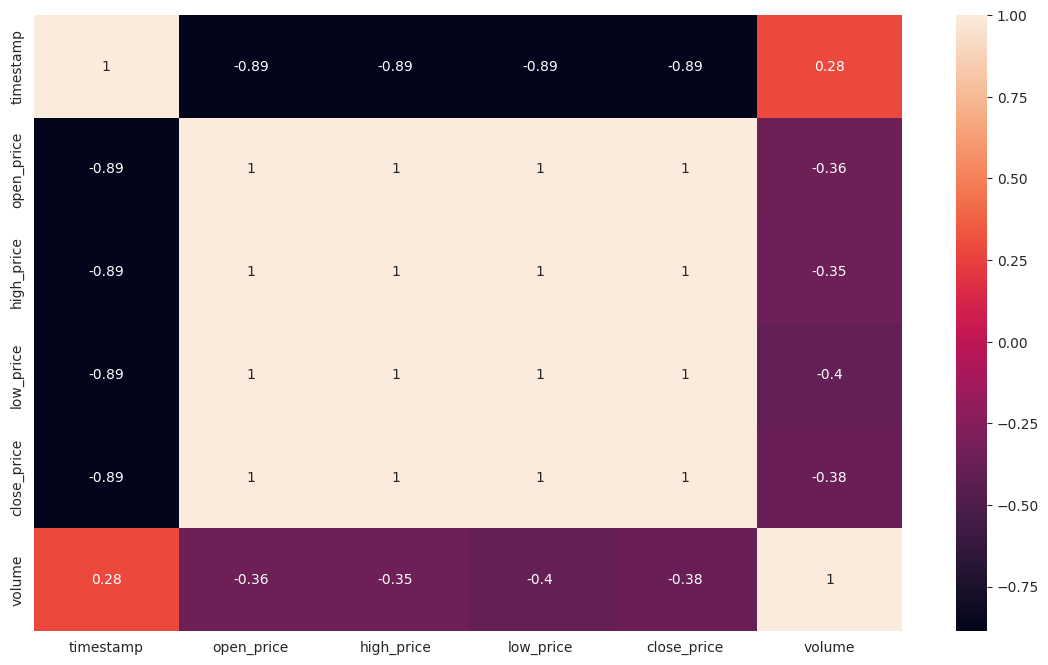

In [25]:
sns.heatmap(df.corr(),annot=True)

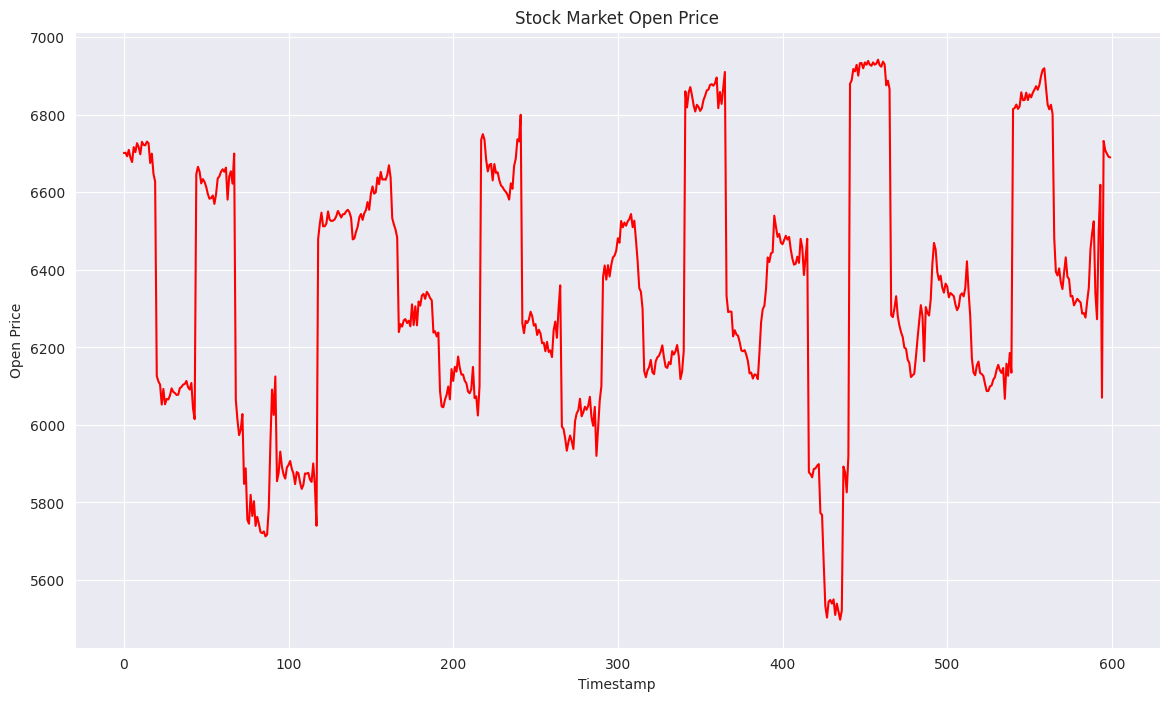

In [26]:
plt.plot(df['open_price'],color='red')
plt.xlabel('Timestamp')
plt.ylabel('Open Price')
plt.title('Stock Market Open Price')
plt.show()

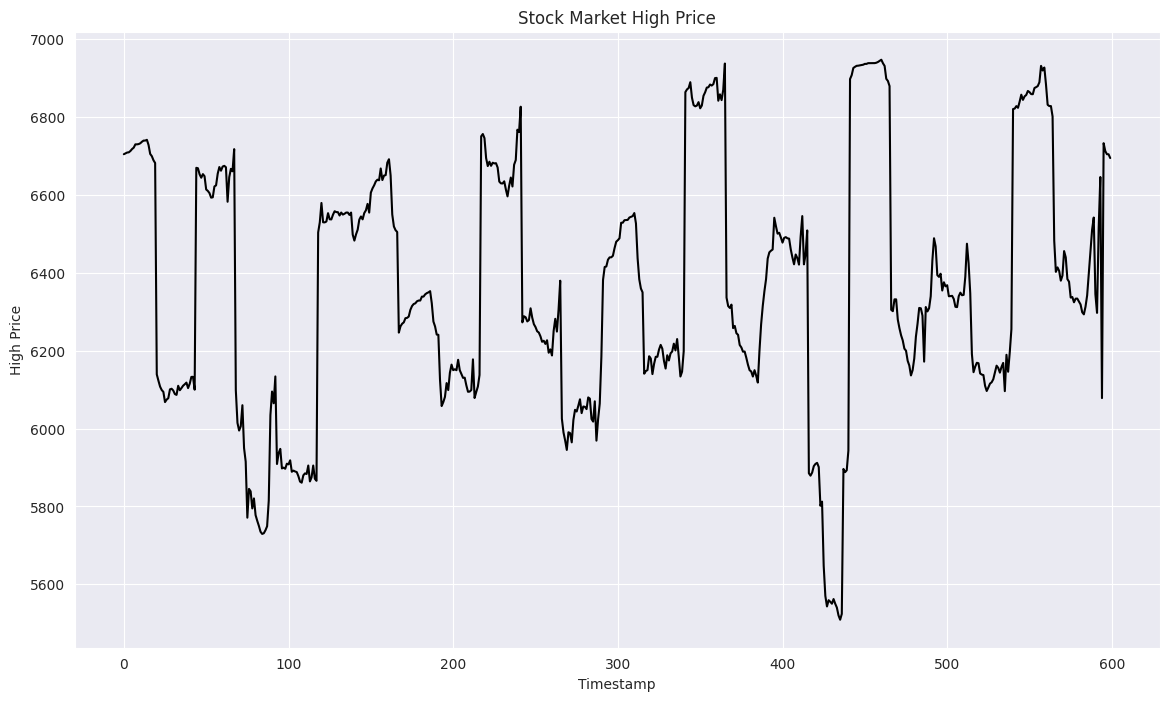

In [27]:
plt.plot(df['high_price'],color='black')
plt.xlabel('Timestamp')
plt.ylabel('High Price')
plt.title('Stock Market High Price')
plt.show()

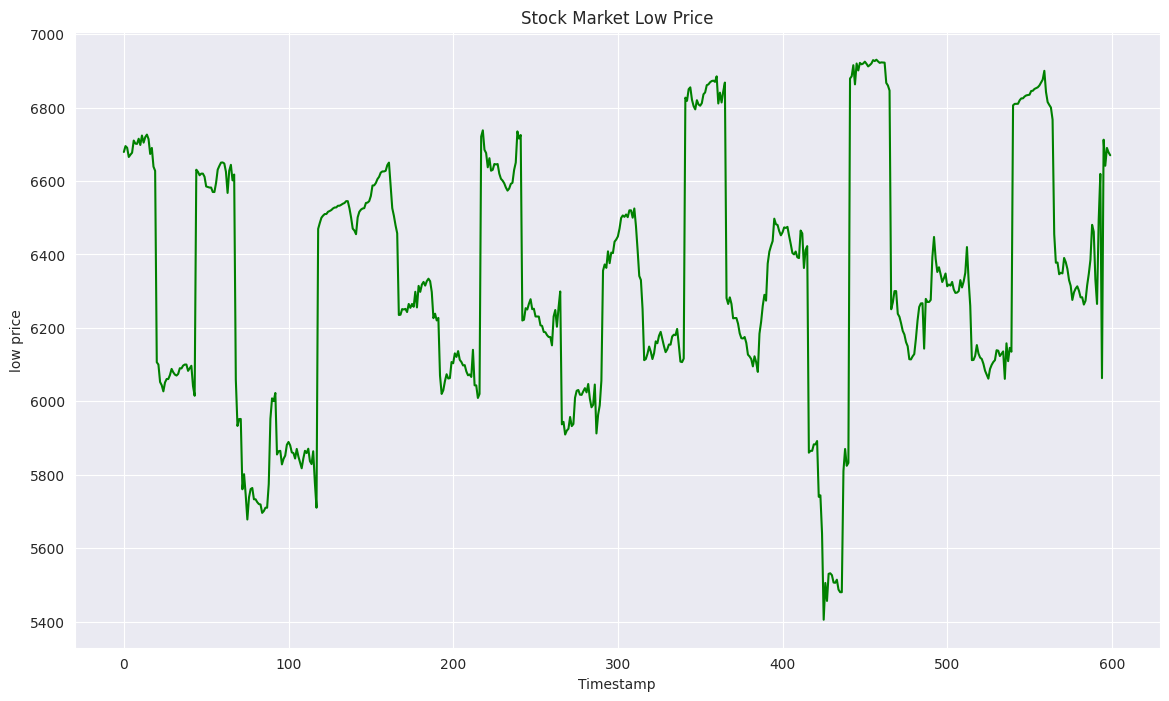

In [28]:
plt.plot(df['low_price'],color='green')
plt.xlabel('Timestamp')
plt.ylabel('low price')
plt.title('Stock Market Low Price')
plt.show()

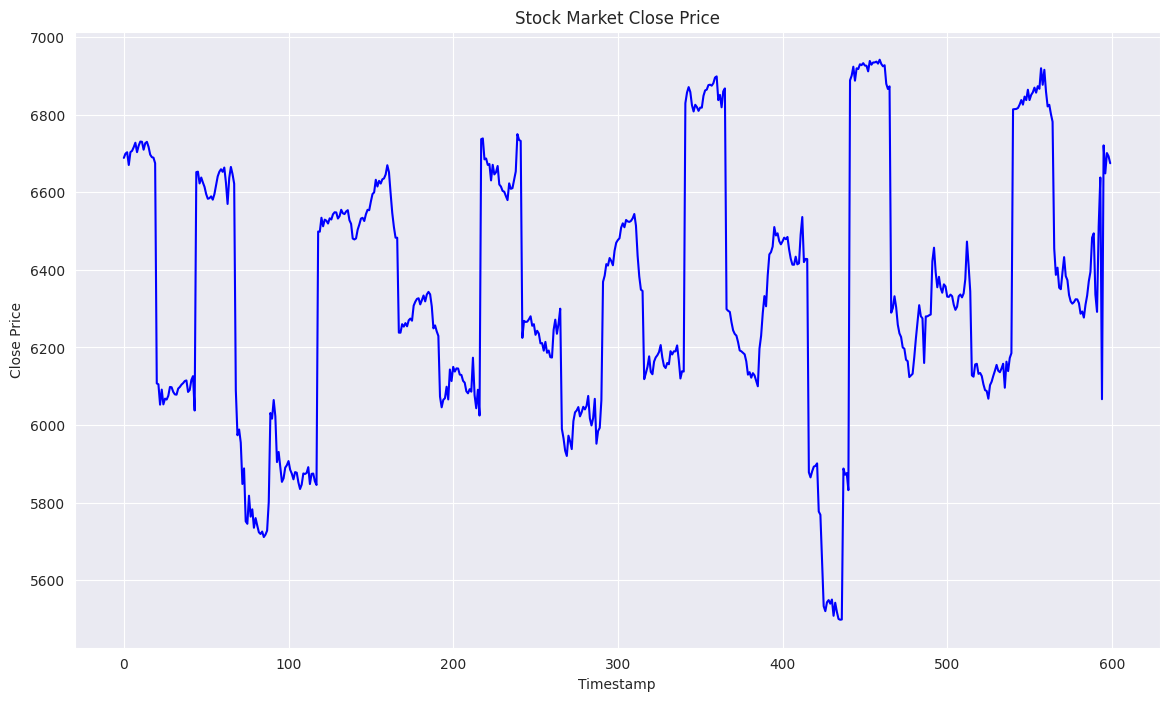

In [29]:
plt.plot(df['close_price'],color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Stock Market Close Price')
plt.show()

**Now we are checking a outliers are present in our dataset by using.**

In [30]:
df.describe()

,timestamp,open_price,high_price,low_price,close_price,volume
count,600,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2025-01-17 06:45:00,6344.349917,6361.547917,6324.403917,6341.670333,11170.283333
min,2025-01-01 03:45:00,5497.600000,5508.850000,5405.000000,5497.900000,1037.000000
25%,2025-01-08 23:15:00,6122.087500,6137.212500,6103.125000,6117.775000,5226.750000
50%,2025-01-16 18:45:00,6319.350000,6335.225000,6298.600000,6318.350000,8799.000000
75%,2025-01-25 02:15:00,6602.225000,6624.100000,6588.500000,6600.412500,13771.500000
max,2025-02-01 09:45:00,6942.000000,6947.700000,6930.250000,6942.000000,117045.000000
std,NaN,328.040279,325.044127,333.290727,329.120019,11183.903429


**Here are show the outliers are present in a volume**

**lets check through the boxplot**

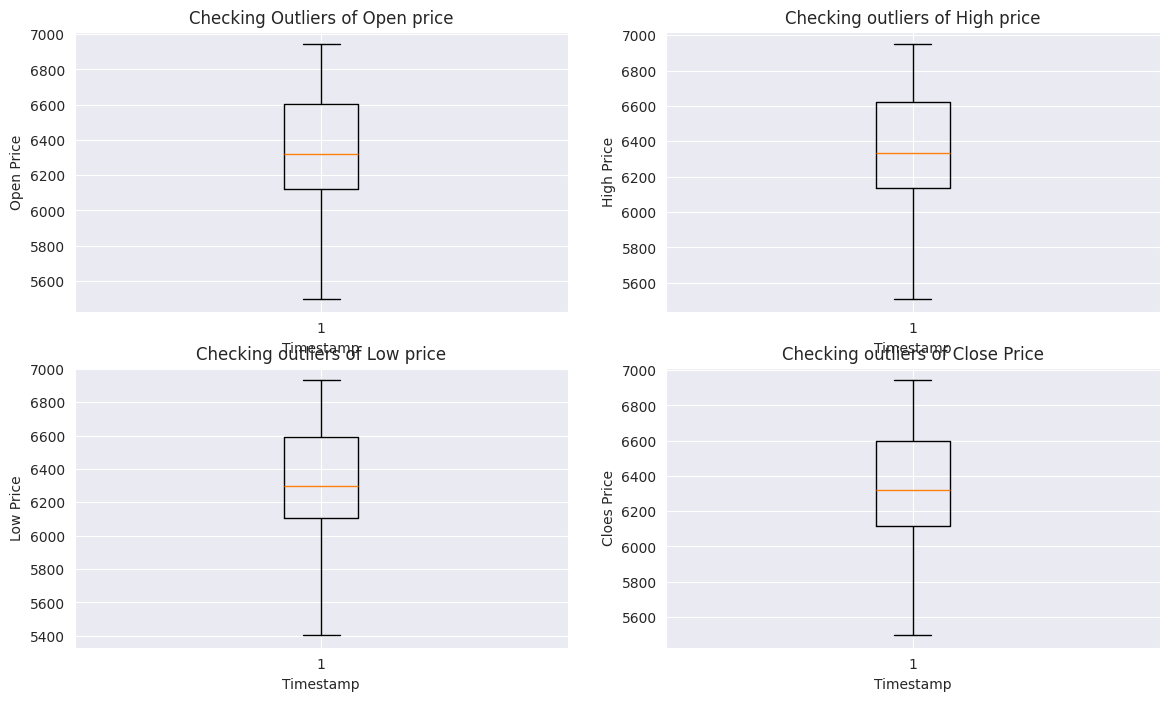

In [32]:
plt.subplot(2,2,1)
plt.boxplot(df['open_price'])
plt.xlabel('Timestamp')
plt.ylabel('Open Price')
plt.title('Checking Outliers of Open price')
plt.subplot(2,2,2)
plt.boxplot(df['high_price'])
plt.xlabel('Timestamp')
plt.ylabel('High Price')
plt.title('Checking outliers of High price')
plt.subplot(2,2,3)
plt.boxplot(df['low_price'])
plt.xlabel('Timestamp')
plt.ylabel('Low Price')
plt.title('Checking outliers of Low price')
plt.subplot(2,2,4)
plt.boxplot(df['close_price'])
plt.xlabel('Timestamp')
plt.ylabel('Cloes Price')
plt.title('Checking outliers of Close Price')
plt.show()

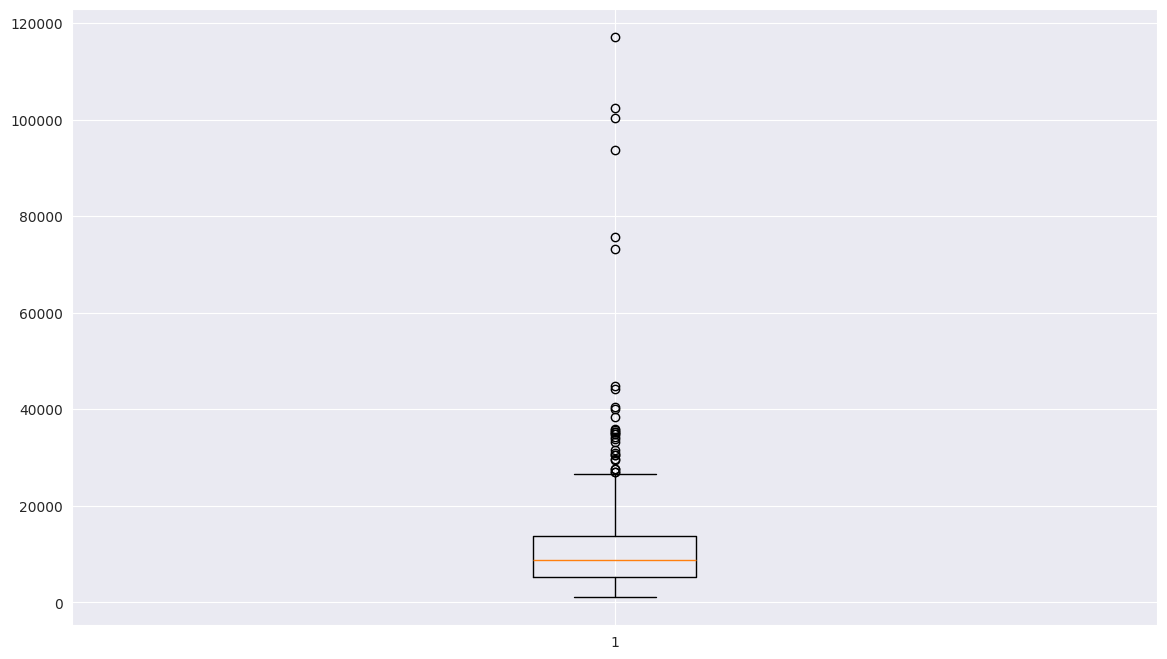

In [34]:
plt.boxplot(df['volume'])
plt.show()

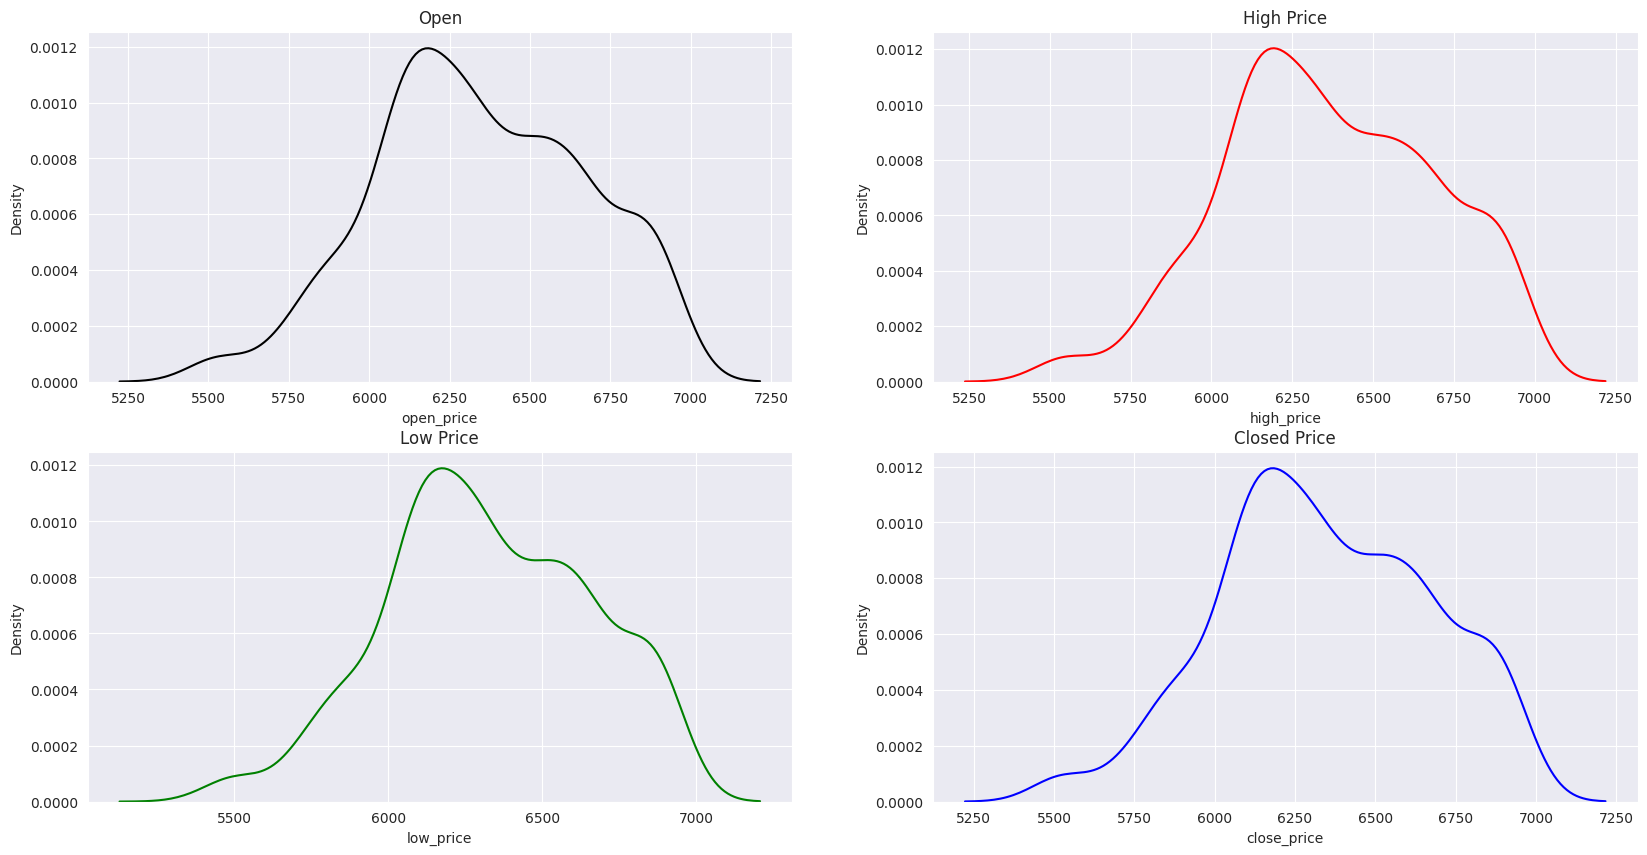

In [35]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(df['open_price'], color='black')
plt.title('Open')

plt.subplot(2,2,2)
sns.kdeplot(df['high_price'], color='red')
plt.title('High Price')

plt.subplot(2,2,3)
sns.kdeplot(df['low_price'], color='green')
plt.title('Low Price')

plt.subplot(2,2,4)
sns.kdeplot(df['close_price'], color='blue')
plt.title('Closed Price')
plt.show()

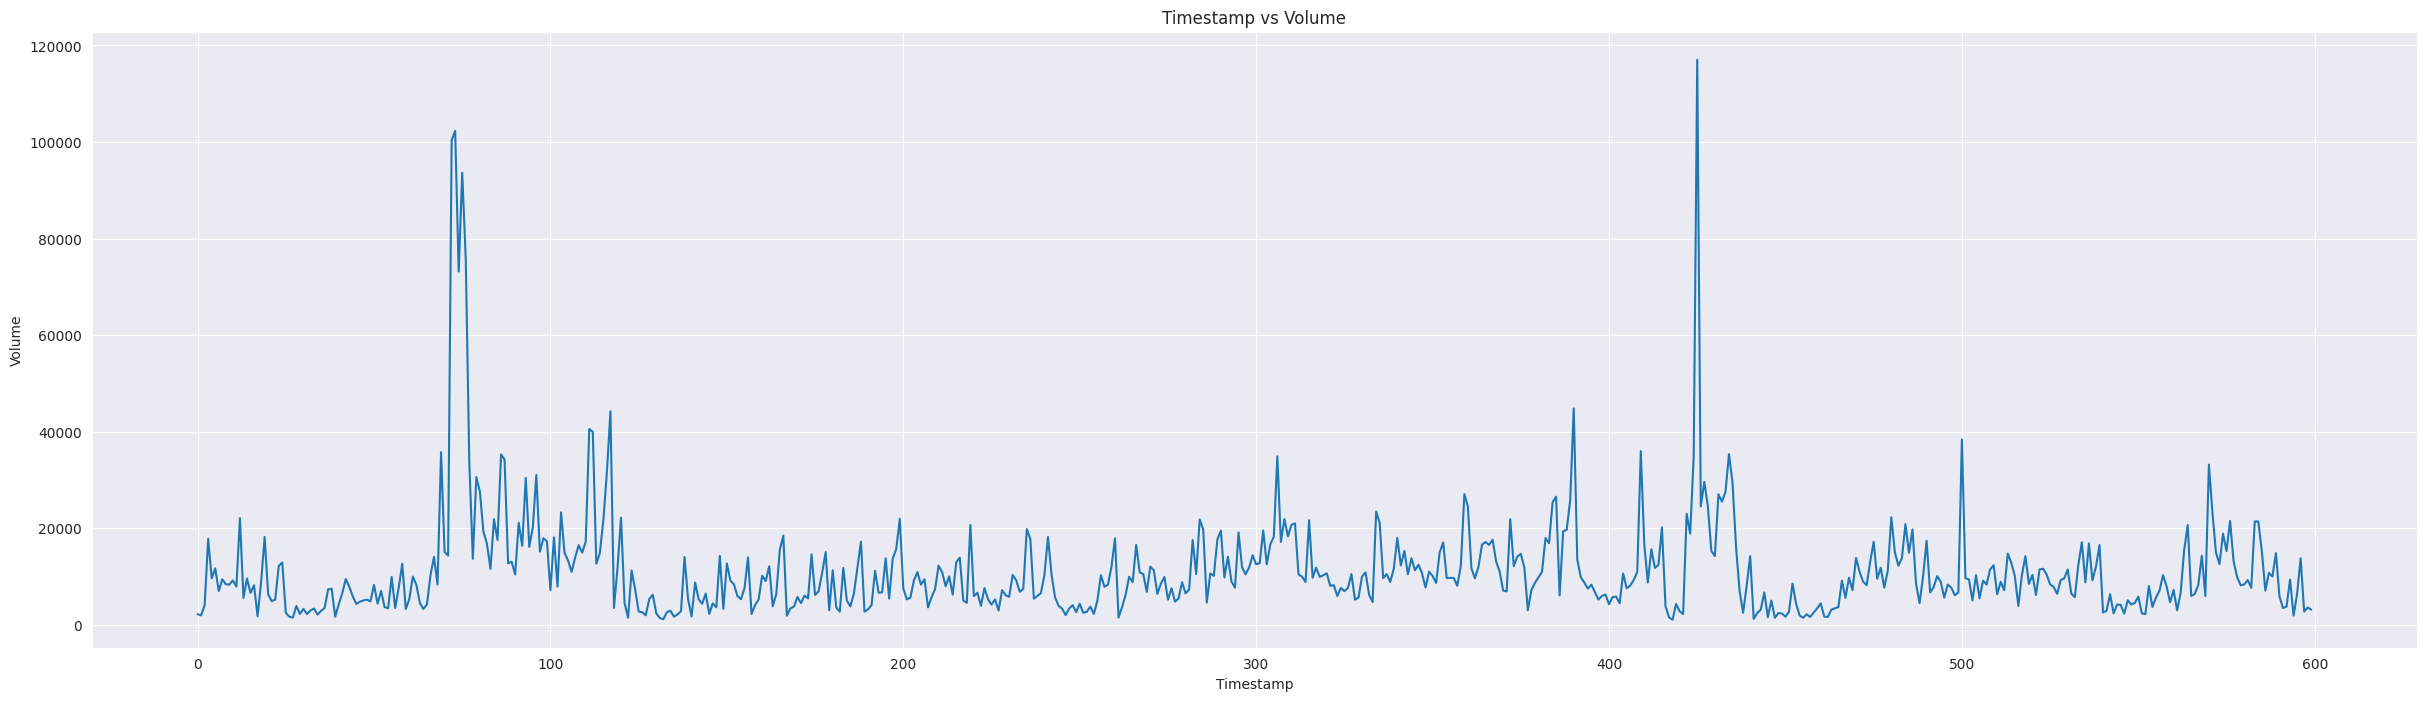

In [36]:
figure=plt.figure(figsize=(30,8))
plt.plot(df['volume'])
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title('Timestamp vs Volume')
plt.show()

In [37]:
df_2 = df.copy()

In [38]:
df_2['15_min_mavg']=df['close_price'].rolling(window=15).mean()

In [39]:
df_2.head(10)

,timestamp,open_price,high_price,low_price,close_price,volume,15_min_mavg
0,2025-01-07 05:15:00,6701.30,6704.90,6678.95,6688.85,2171,NaN
1,2025-01-07 06:00:00,6702.35,6707.20,6695.00,6699.95,1946,NaN
2,2025-01-07 05:45:00,6692.95,6709.25,6690.45,6703.40,4039,NaN
3,2025-01-07 09:45:00,6709.50,6709.75,6665.40,6670.60,17808,NaN
4,2025-01-07 04:45:00,6689.35,6713.25,6671.55,6703.70,9619,NaN
5,2025-01-07 04:00:00,6678.00,6718.20,6677.00,6707.05,11676,NaN
6,2025-01-07 09:00:00,6716.50,6721.80,6710.10,6716.50,6991,NaN
7,2025-01-07 08:30:00,6703.60,6730.25,6701.80,6727.95,9414,NaN
8,2025-01-07 08:15:00,6726.75,6730.25,6701.00,6703.60,8389,NaN
9,2025-01-07 09:15:00,6716.50,6731.00,6715.05,6720.35,8316,NaN


In [40]:
df_2.tail(10)

,timestamp,open_price,high_price,low_price,close_price,volume,15_min_mavg
590,2025-01-23 07:45:00,6339.60,6345.30,6331.20,6336.50,5867,6344.890000
591,2025-01-24 06:00:00,6272.70,6297.25,6265.10,6291.80,3449,6343.476667
592,2025-01-20 05:30:00,6499.00,6515.40,6492.55,6512.30,3759,6356.493333
593,2025-01-08 08:15:00,6619.40,6646.35,6619.25,6638.25,9342,6377.426667
594,2025-01-29 06:15:00,6070.40,6078.30,6063.05,6066.60,1906,6360.273333
595,2025-01-07 07:45:00,6732.45,6733.25,6712.40,6721.10,6408,6387.396667
596,2025-01-07 04:15:00,6708.20,6713.00,6641.50,6648.90,13761,6411.523333
597,2025-01-07 05:00:00,6699.60,6704.95,6690.00,6701.30,2722,6438.763333
598,2025-01-07 05:30:00,6691.70,6704.75,6677.80,6692.95,3565,6466.490000
599,2025-01-07 06:30:00,6690.00,6695.05,6670.00,6675.00,3129,6490.803333


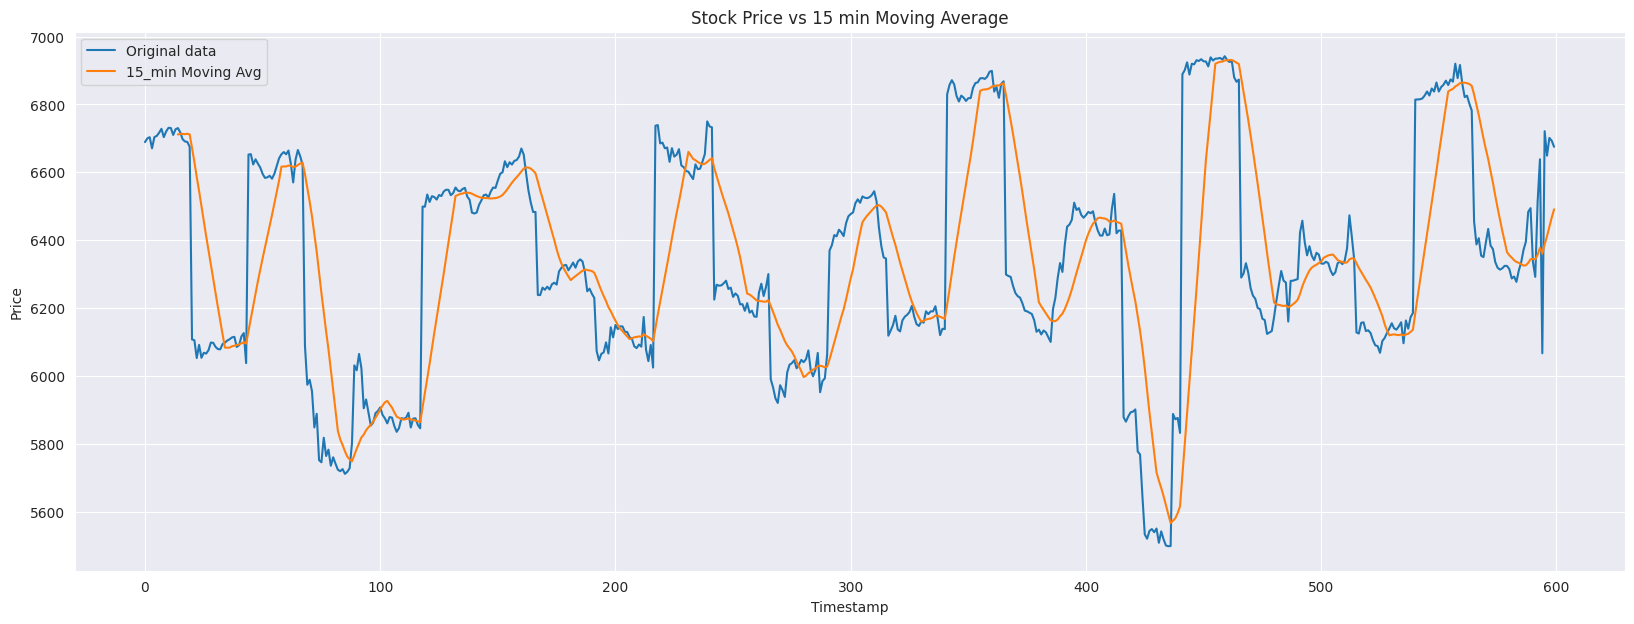

In [41]:
plt.figure(figsize=(20,7))
plt.plot(df_2['close_price'],label='Original data')
plt.plot(df_2['15_min_mavg'],label='15_min Moving Avg')
plt.legend()
plt.title('Stock Price vs 15 min Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler

In [43]:
df

,timestamp,open_price,high_price,low_price,close_price,volume
0,2025-01-07 05:15:00,6701.30,6704.90,6678.95,6688.85,2171
1,2025-01-07 06:00:00,6702.35,6707.20,6695.00,6699.95,1946
2,2025-01-07 05:45:00,6692.95,6709.25,6690.45,6703.40,4039
3,2025-01-07 09:45:00,6709.50,6709.75,6665.40,6670.60,17808
4,2025-01-07 04:45:00,6689.35,6713.25,6671.55,6703.70,9619
...,...,...,...,...,...,...
595,2025-01-07 07:45:00,6732.45,6733.25,6712.40,6721.10,6408
596,2025-01-07 04:15:00,6708.20,6713.00,6641.50,6648.90,13761
597,2025-01-07 05:00:00,6699.60,6704.95,6690.00,6701.30,2722
598,2025-01-07 05:30:00,6691.70,6704.75,6677.80,6692.95,3565


In [44]:
df_2.shape

(600, 7)

In [45]:
cols = ['timestamp','close_price']
clp_df=pd.DataFrame(df[cols])
clp_df

,timestamp,close_price
0,2025-01-07 05:15:00,6688.85
1,2025-01-07 06:00:00,6699.95
2,2025-01-07 05:45:00,6703.40
3,2025-01-07 09:45:00,6670.60
4,2025-01-07 04:45:00,6703.70
...,...,...
595,2025-01-07 07:45:00,6721.10
596,2025-01-07 04:15:00,6648.90
597,2025-01-07 05:00:00,6701.30
598,2025-01-07 05:30:00,6692.95


In [46]:
clp_df.shape

(600, 2)

In [47]:
clp_df=clp_df.reset_index()

In [48]:
cls_stk_df = clp_df.copy()
del clp_df['timestamp']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(clp_df).reshape(-1,1))
print(closedf.shape)

(1200, 1)


In [49]:
train_size=int(len(closedf)*0.86)
test_size=len(closedf)-train_size
train_data,test_data=closedf[0:train_size,:],closedf[train_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1032, 1)
test_data:  (168, 1)


In [51]:
def create_dset(dset, time_step=1):
 dataX, dataY = [], []
 for i in range(len(dset)-time_step-1):
    a = dset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dset[i + time_step, 0])
 return np.array(dataX), np.array(dataY)

In [52]:
time_step = 15
x_train, y_train = create_dset(train_data, time_step)
x_test, y_test = create_dset(test_data, time_step)

In [53]:
import math
from sklearn.svm import SVR
svr = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [54]:
train_pred=svr.predict(x_train)
test_pred=svr.predict(x_test)
train_pred = train_pred.reshape(-1,1)
test_pred = test_pred.reshape(-1,1)
print("Train data prediction: ", train_pred.shape)
print("Test data prediction: ", test_pred.shape)

Train data prediction:  (1016, 1)
Test data prediction:  (152, 1)


In [55]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [56]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_pred)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_pred))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_pred))

Train data RMSE:  326.0627013924419
Train data MSE:  106316.88523933673
Test data MAE:  274.498287356687


In [57]:
print("\nTest data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_pred)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_pred))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_pred))


Test data RMSE:  188.39714841830974
Test data MSE:  35493.48553215063
Test data MAE:  158.89716994467904


In [58]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_pred))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_pred))

Train data explained variance regression score: 0.9945766333385859
Test data explained variance regression score: 0.9959800339494483


In [67]:
train_r2_svr=r2_score(original_ytrain, train_pred)
test_r2_svr=r2_score(original_ytest, test_pred)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9884871499663407
Test data R2 score: 0.995975012938582


In [59]:
look_back = time_step
train_Pred_Plot = np.empty_like(closedf)
train_Pred_Plot[:, :] = np.nan
train_Pred_Plot[look_back:len(train_pred)+look_back, :] = train_pred
print("Train predicted data: ", train_Pred_Plot.shape)

Train predicted data:  (1200, 1)


In [60]:
test_Pred_Plot = np.empty_like(closedf)
test_Pred_Plot[:, :] = np.nan
test_Pred_Plot[len(train_pred)+(look_back*2)+1:len(closedf)-1, :] = test_pred
print("Test predicted data: ", test_Pred_Plot.shape)

Test predicted data:  (1200, 1)


In [64]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 2
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)

        yhat = svr.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        yhat = svr.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  2


In [65]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17]
